<a href="https://colab.research.google.com/github/FloydNichols97/OMAP/blob/main/BC_OM_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install imbalanced-learn

In [ ]:
%%capture
!pip install shap

In [ ]:
!pip install hdbscan

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
clustering

DBSCAN(eps=3, min_samples=2)

Load Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

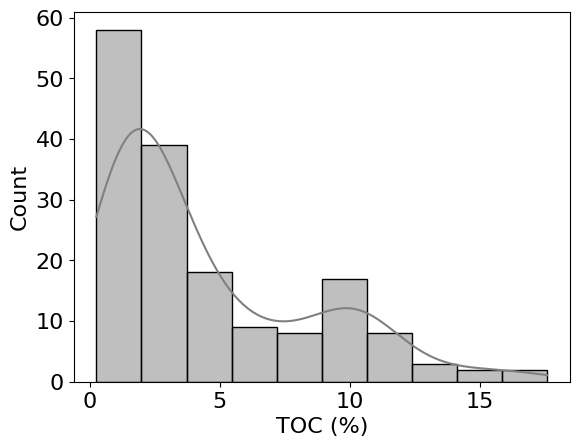

In [ ]:
url = 'https://raw.githubusercontent.com/FloydNichols97/BC_Cores/main/All_Lake_Data.csv'
All_Lake_Data = pd.read_csv(url)
All_Lake_Data = All_Lake_Data.rename(columns={"d13C (VPDB)":"d13C", "Category ":"Category",
                                              "d15N ":"d15N"})
All_Lake_Data['C_N'] = (All_Lake_Data['TOC']/All_Lake_Data['TON'])

All_Lake_Data = All_Lake_Data.drop(columns=['Year ', 'Season', 'Category', 'Type', 'Sample', 'Lake', 'Brine', 'Age ',
                                            'TLE', 'S% by weight ', 'DIC', 'TON', 'd13C', 'd15N', 'MS1 ', 'C_N'])
All_Lake_Data = All_Lake_Data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
All_Lake_Data = All_Lake_Data.dropna()

# Kernel Density Histogram
sns.histplot(All_Lake_Data.TOC, kde=True, edgecolor = 'k', color = 'grey')
plt.tick_params(labelsize=16)
plt.xlabel("TOC (%)", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.savefig("Histogram.png", format="png", bbox_inches="tight", transparent=True)

Data Wrangling

In [ ]:
#%%capture
url = 'https://raw.githubusercontent.com/FloydNichols97/BC_Cores/main/All_Lake_Data.csv'
All_Lake_Data = pd.read_csv(url)
All_Lake_Data = All_Lake_Data.rename(columns={"d13C (VPDB)":"d13C", "Category ":"Category",
                                              "d15N ":"d15N"})
All_Lake_Data['C_N'] = (All_Lake_Data['TOC']/All_Lake_Data['TON'])

# create a list of our conditions
conditions = [
    (All_Lake_Data['TOC'] <= 2.5),
    #(All_Lake_Data['TOC'] > 2) & (All_Lake_Data['TOC'] <= 4),
    (All_Lake_Data['TOC'] > 2.5) & (All_Lake_Data['TOC'] <= 10),
    (All_Lake_Data['TOC'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Moderate', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
All_Lake_Data['Productivity'] = np.select(conditions, values)

All_Lake_Data = All_Lake_Data.drop(columns=['Year ', 'Season', 'Category', 'Type', 'Sample', 'Lake', 'Brine', 'Age ',
                                            'TLE', 'S% by weight ', 'DIC', 'TOC', 'TON', 'd13C', 'd15N', 'MS1 ', 'C_N'])
All_Lake_Data = All_Lake_Data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
All_Lake_Data = All_Lake_Data.dropna()

display(All_Lake_Data)

,Depth,Mg,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,...,Th,U,LE,Al,Si,P,S,K,Ca,Productivity
0,5.0,29387.02000,4014.770000,251.665000,84.575000,523.960000,33375.89000,0.0,34.720000,22.850000,...,0.000000,0.000000,797842.4400,15833.035000,70728.71000,0.00,4558.970000,5941.025000,35424.39500,Low
1,8.0,36385.10000,3343.373333,73.723333,37.406667,511.261667,33616.54333,0.0,44.530000,15.846667,...,0.000000,0.000000,807738.2950,14554.518330,68978.01500,0.00,4794.981667,6079.771667,34335.22000,Low
2,11.0,26963.39000,3074.715000,109.815000,25.981667,509.953333,33657.16000,0.0,47.208333,20.115000,...,0.000000,0.000000,819145.8183,12698.506670,60939.57500,76.01,5447.870000,5741.038333,32055.69667,Low
3,14.0,0.00000,3177.236667,119.530000,55.218333,477.608333,31574.95000,0.0,36.153333,17.311667,...,0.000000,0.000000,843028.0383,11030.205000,48494.25000,0.00,6967.685000,5148.985000,29530.81000,Low
4,17.0,0.00000,1599.716667,0.000000,0.000000,350.895000,23254.27833,0.0,25.545000,14.963333,...,0.000000,0.000000,923940.9217,4958.701667,16915.66833,0.00,9221.118333,3540.120000,15782.82000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,13.0,16800.59000,3093.213333,141.245000,35.673333,472.955000,31586.11667,0.0,37.818333,19.900000,...,0.000000,0.000000,834581.6967,11457.695000,56765.81667,0.00,9966.303333,5481.731667,29051.44333,Low
274,16.0,18671.32833,3062.073333,195.603333,19.251667,492.726667,32482.12667,0.0,43.845000,21.478333,...,0.000000,0.000000,829607.8400,11690.866670,57717.55000,0.00,9522.941667,5556.278333,30435.94167,Low
275,19.0,18452.30833,2621.790000,116.795000,10.096667,496.106667,32469.45167,0.0,42.635000,21.368333,...,0.000000,0.000000,831012.0283,12016.775000,59324.46500,0.00,8506.551667,5514.251667,28995.87500,Low
276,22.0,18632.48167,2442.453333,49.733333,7.575000,505.861667,33249.78667,0.0,45.828333,21.711667,...,0.000000,0.000000,826497.8583,12783.486670,63522.65167,0.00,7614.495000,5682.050000,28586.72167,Low


# Dimensionality Reduction

t-SNE

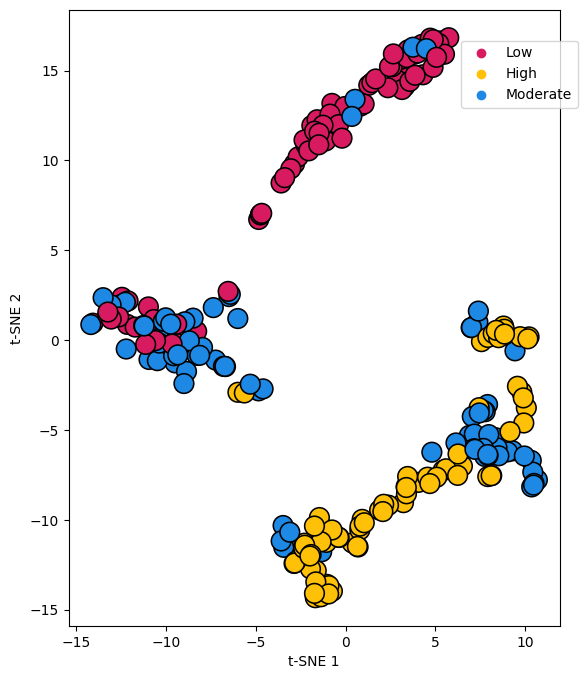

In [ ]:
from sklearn.manifold import TSNE

X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components, random_state = 42)
tsne_result = tsne.fit_transform(X)

# Two dimensions for each of our images

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize=(8,8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue = 'label', edgecolor = 'k', data=tsne_result_df,
                ax=ax, s=200, palette=palette)
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.8, 0.95), loc=2, borderaxespad=0.0)

In [ ]:
%%capture
from sklearn.manifold import TSNE
import plotly.express as px

X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# We want to get TSNE embedding with 2 dimensions
n_components = 3
tsne = TSNE(n_components, random_state = 42)
tsne_result = tsne.fit_transform(X)

#Color Map
palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'tsne_3': tsne_result[:,2], 'label': y})
fig = px.scatter_3d(tsne_result_df, x='tsne_1', y='tsne_2', z='tsne_3', color='label',
                    color_discrete_sequence=["#D81B60", "#FFC107", "#1E88E5"], width = 1013, height = 760)
fig.update_traces(marker=dict(line=dict(width=2, color='Black')))
fig.show()

MDS

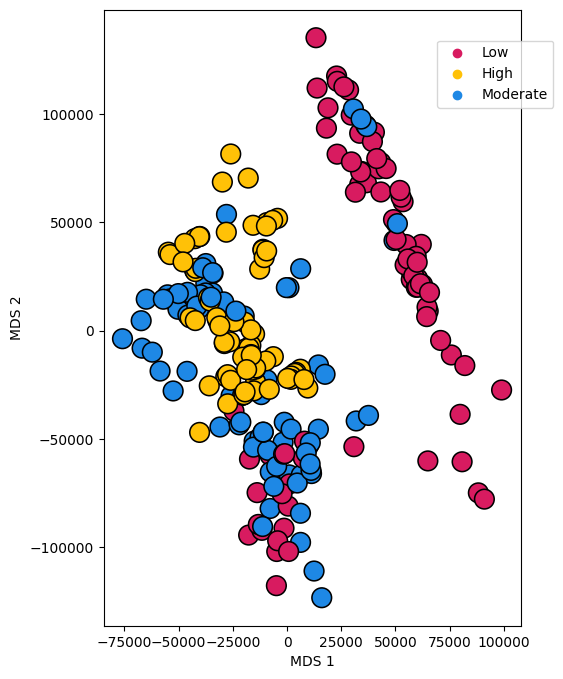

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

MDS = MDS(n_components=2, normalized_stress='auto', metric = True)
Xt = MDS.fit_transform(X)

palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

MDS_result = pd.DataFrame({'MDS_1': Xt[:,0], 'MDS_2': Xt[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize=(8,8))
sns.scatterplot(x='MDS_1', y='MDS_2', hue = 'label', edgecolor = 'k', data=MDS_result, ax=ax, s=200, palette=palette)
ax.set_xlabel('MDS 1')
ax.set_ylabel('MDS 2')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.8, 0.95), loc=2, borderaxespad=0.0)

PCA

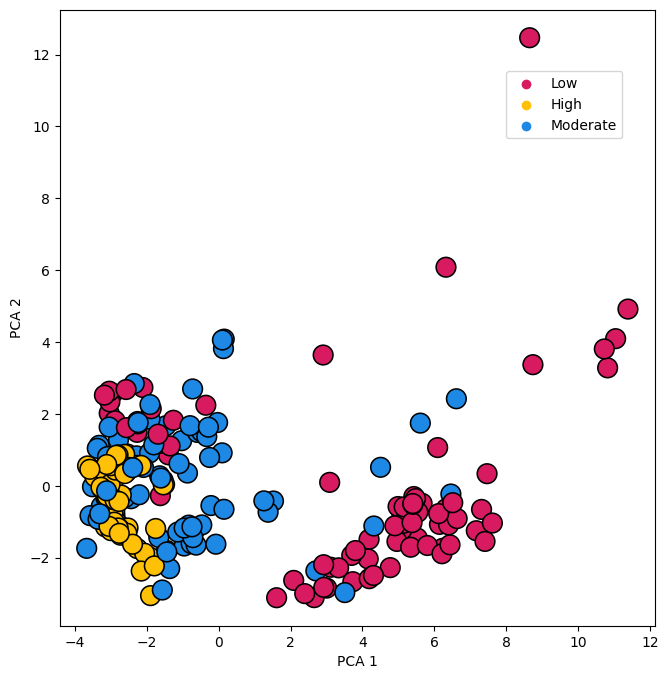

In [ ]:
np.random.seed(300)
X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

PCA_df = pd.DataFrame({'PCA_1': Xt[:,0], 'PCA_2': Xt[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue = 'label', edgecolor = 'k', data=PCA_df, ax=ax, s=200, palette=palette)
#sns.scatterplot(x='PCA_1', y='PCA_2', hue = X['Depth'], edgecolor = 'k', data=PCA_df, ax=ax, s=200)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.75, 0.9), loc=2, borderaxespad=0.0)

Non-Linear PCA

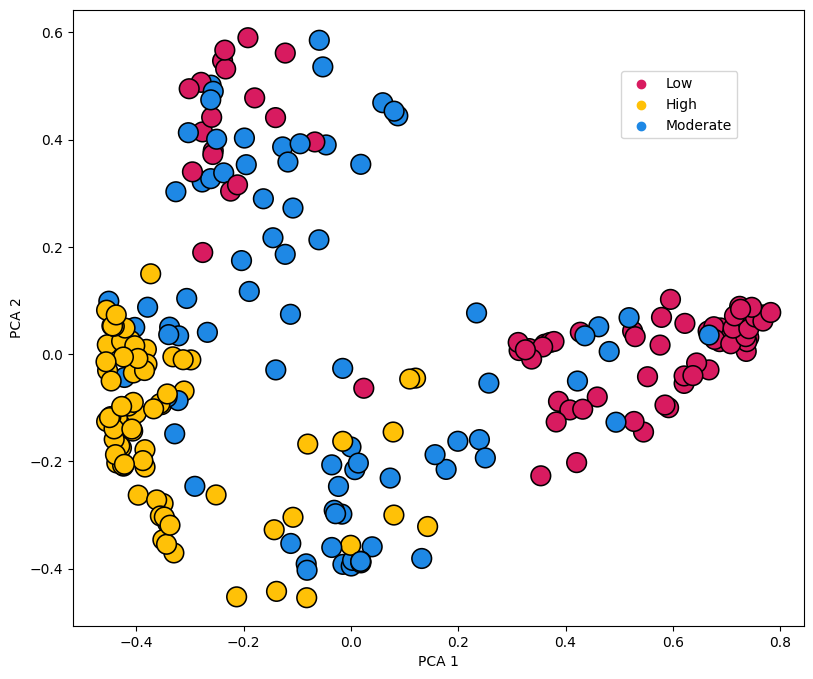

In [ ]:
from sklearn.decomposition import KernelPCA

np.random.seed(300)
X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

kern_pca = KernelPCA(n_components = 2, kernel = 'rbf')
pipe = Pipeline([('scaler', StandardScaler()), ('pca', kern_pca)])
Xt = pipe.fit_transform(X)

palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

kern_PCA_df = pd.DataFrame({'PCA_1': Xt[:,0], 'PCA_2': Xt[:,1], 'label': y})
fig, ax = plt.subplots(1, figsize=(12,8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue = 'label', edgecolor = 'k', data=kern_PCA_df, ax=ax, s=200, palette=palette)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.75, 0.9), loc=2, borderaxespad=0.0)

In [ ]:
%%capture
from sklearn.manifold import TSNE
import plotly.express as px

X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

PCA_df = pd.DataFrame({'PCA_1': Xt[:,0], 'PCA_2': Xt[:,1], 'PCA_3': Xt[:,2], 'label': y})
fig = px.scatter_3d(PCA_df , x='PCA_1', y='PCA_2', z='PCA_3', color='label',
                    color_discrete_sequence=["#D81B60", "#FFC107", "#1E88E5"], width = 1013, height = 760)
fig.update_traces(marker=dict(line=dict(width=2, color='Black')))
fig.show()

 Dimension Reduction Multiplot

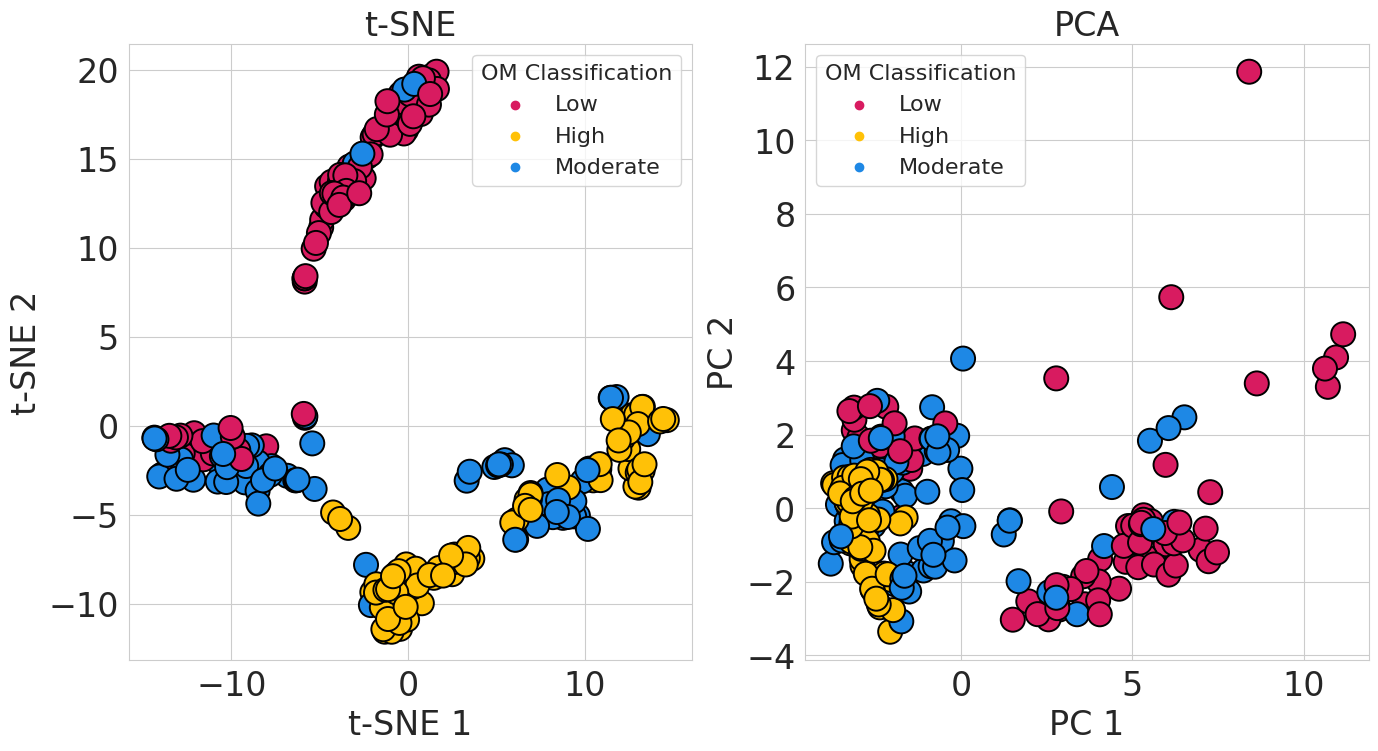

In [ ]:
# Overall figure dimension
plt.figure(figsize=(16,8))

palette = {"Low":"#D81B60",
           "Moderate":"#1E88E5",
           "High":"#FFC107"}

# Set Seed
np.random.seed(300)

# t-SNE
X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

n_components = 2
tsne = TSNE(n_components, random_state = 2)
tsne_result = tsne.fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
sns.set_style("whitegrid")
plt.subplot(1,2,1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue = 'label', edgecolor = 'k', data=tsne_result_df, s=300, palette=palette)
plt.title('t-SNE', fontsize = 24)
plt.legend(title = 'OM Classification', title_fontsize = 16, fontsize = 16)
plt.tick_params(labelsize=24)
plt.xlabel('t-SNE 1', fontsize = 24)
plt.ylabel('t-SNE 2', fontsize = 24)

# PCA
X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
PCA_df = pd.DataFrame({'PCA_1': Xt[:,0], 'PCA_2': Xt[:,1], 'label': y})
sns.set_style("whitegrid")
plt.subplot(1,2,2)
sns.scatterplot(x='PCA_1', y='PCA_2', hue = 'label', edgecolor = 'k', data=PCA_df, s=300, palette=palette)
plt.title('PCA', fontsize = 24)
plt.legend(title = 'OM Classification', title_fontsize = 16, fontsize = 16)
plt.tick_params(labelsize=24)
plt.xlabel('PC 1', fontsize = 24)
plt.ylabel('PC 2', fontsize = 24)

plt.savefig("Dimensionality_Reduction_Panel.png", format="png", bbox_inches="tight", transparent=True)

Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



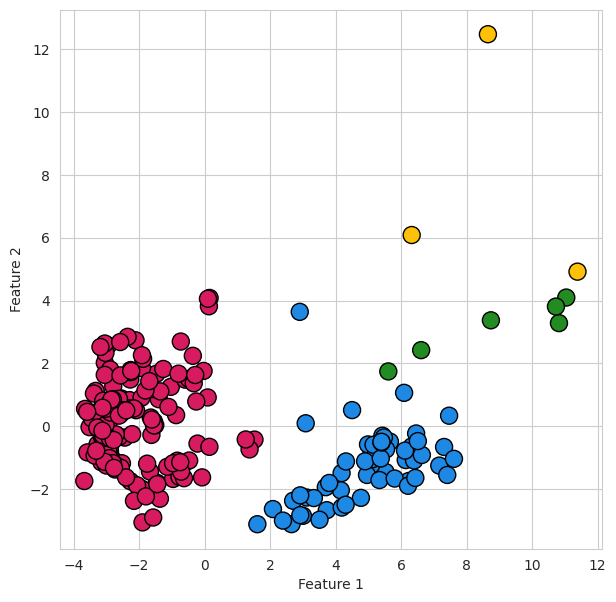

In [ ]:
np.random.seed(300)
X = All_Lake_Data.drop(columns=['Productivity'])
y = All_Lake_Data['Productivity']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 4, random_state=0)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(Xt)

# Set Colormap Based on Number of Clusters
LABEL_COLOR_MAP = {0 : '#D81B60',
                   1 : '#1E88E5',
                   2 : '#FFC107',
                   3 : '#228B22'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (7,7))
plt.scatter(Xt[:,0],Xt[:,1], c = label_color, alpha=1, s = 150, edgecolor = 'k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Supervised Learning

kNN

Text(0, 0.5, 'Testing Accuracy')

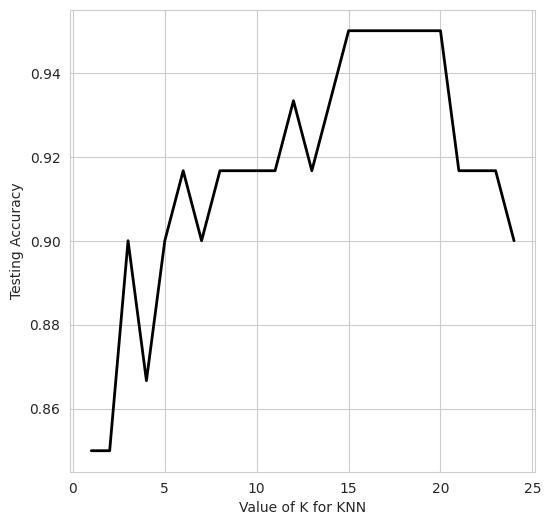

In [ ]:
# k Nearest-Neighbor
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
        kNN_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
        kNN_model.fit(X_train, y_train)
        kNN_predictions = kNN_model.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test, kNN_predictions)
        scores_list.append(metrics.accuracy_score(y_test, kNN_predictions))

# Plot
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.plot(k_range, scores_list, linewidth = 2, color = 'k')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# k Nearest-Neighbor
kNN_model = KNeighborsClassifier(n_neighbors=4, weights='distance')
kNN_model.fit(X_train, y_train)
kNN_predictions = kNN_model.predict(X_test)
kNN_cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=10, random_state=1)
kNN_scores = cross_val_score(kNN_model, X, y, scoring='accuracy', cv=kNN_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(kNN_scores), std(kNN_scores))))

Accuracy: 0.841 (0.025)


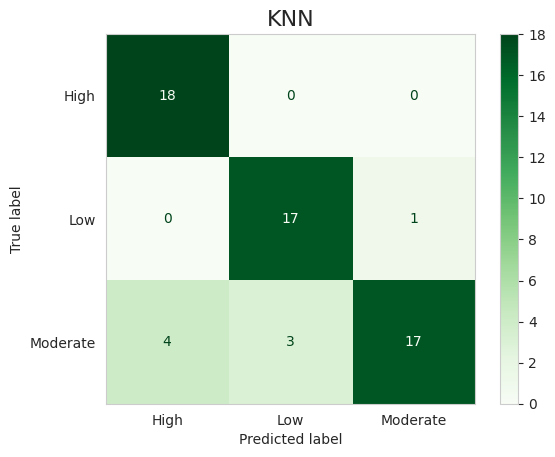

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, kNN_predictions, labels=kNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=kNN_model.classes_)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')
plt.title('KNN', fontsize = 16)
plt.grid(False)

In [ ]:
print(classification_report(y_test, kNN_predictions))

              precision    recall  f1-score   support

        High       0.82      1.00      0.90        18
         Low       0.85      0.94      0.89        18
    Moderate       0.94      0.71      0.81        24

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.86        60



Random Forest

In [ ]:
# Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=200, min_samples_split = 5, bootstrap=True)
RF_model.fit(X_train, y_train)
RF_predictions = RF_model.predict(X_test)
RF_cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=10, random_state=1)
RF_scores = cross_val_score(RF_model, X, y, scoring='accuracy', cv=RF_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(RF_scores), std(RF_scores))))

Accuracy: 0.881 (0.079)


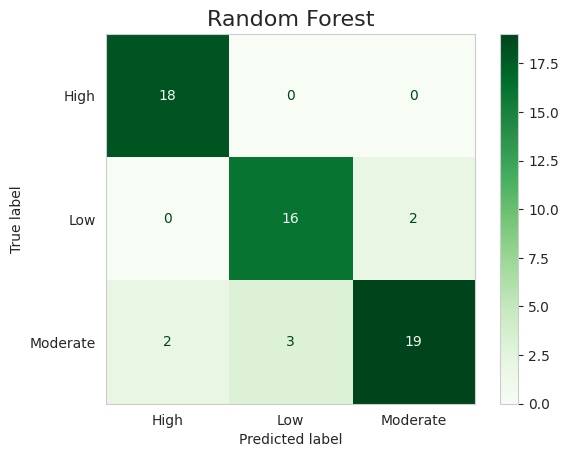

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, RF_predictions, labels=RF_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=RF_model.classes_)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')
plt.title('Random Forest', fontsize = 16)
plt.grid(False)

In [ ]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

        High       0.90      1.00      0.95        18
         Low       0.84      0.89      0.86        18
    Moderate       0.90      0.79      0.84        24

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.89        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
%%capture
importances = RF_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = All_Lake_Data.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

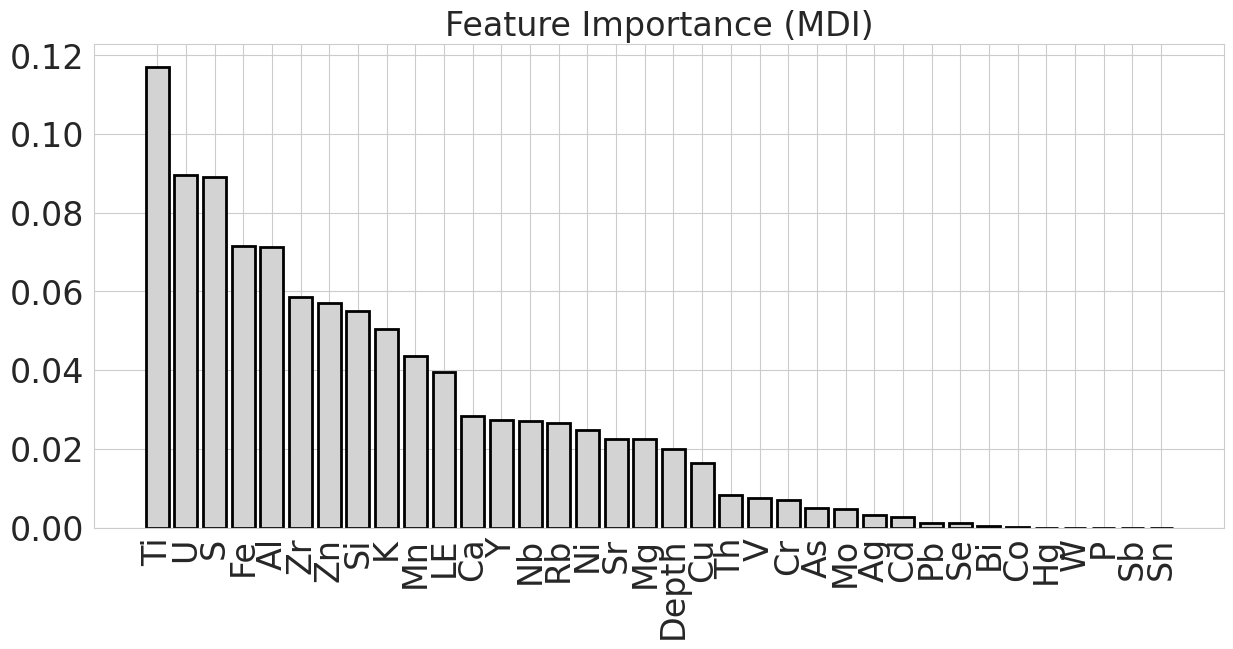

In [ ]:
plt.figure(figsize=(12,6))

sns.set_style("whitegrid")

plt.title('Feature Importance (MDI)', fontsize = 24)
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center', color = '#D3D3D3', edgecolor = 'k', linewidth = 2)
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=24)

plt.savefig("Feature_Importance.png", format="png", bbox_inches="tight", transparent=True)

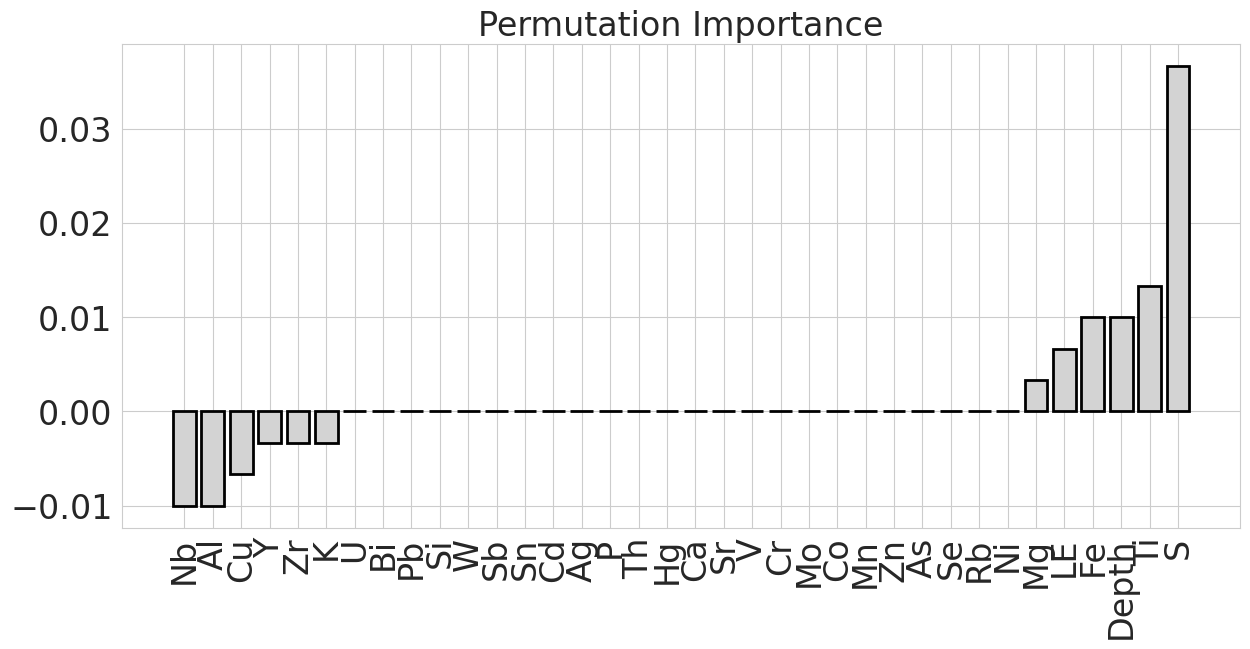

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(RF_model, X_test, y_test)
feat_labels = All_Lake_Data.columns[1:]
sorted_indices = perm_importance.importances_mean.argsort()

plt.figure(figsize=(12,6))
plt.title('Permutation Importance', fontsize = 24)
plt.bar(feat_labels[sorted_indices], perm_importance.importances_mean[sorted_indices], align='center', color = '#D3D3D3', edgecolor = 'k', linewidth = 2)
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=24)

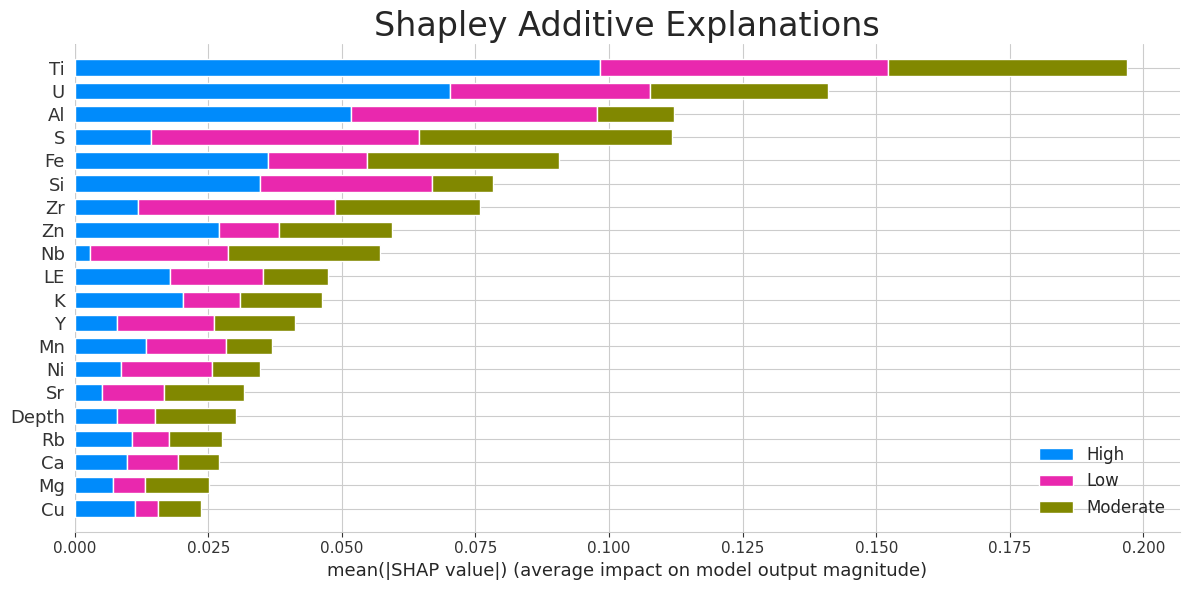

In [ ]:
import shap
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(X_test)

plt.title('Shapley Additive Explanations', fontsize = 24)
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=[12,6], class_names = RF_model.classes_, cmap = {"Low":"#D81B60", "Moderate":"#FFC107", "High":"#1E88E5"}) # Class 0 is High, Class 1 is Low, and Class 2 is Moderate

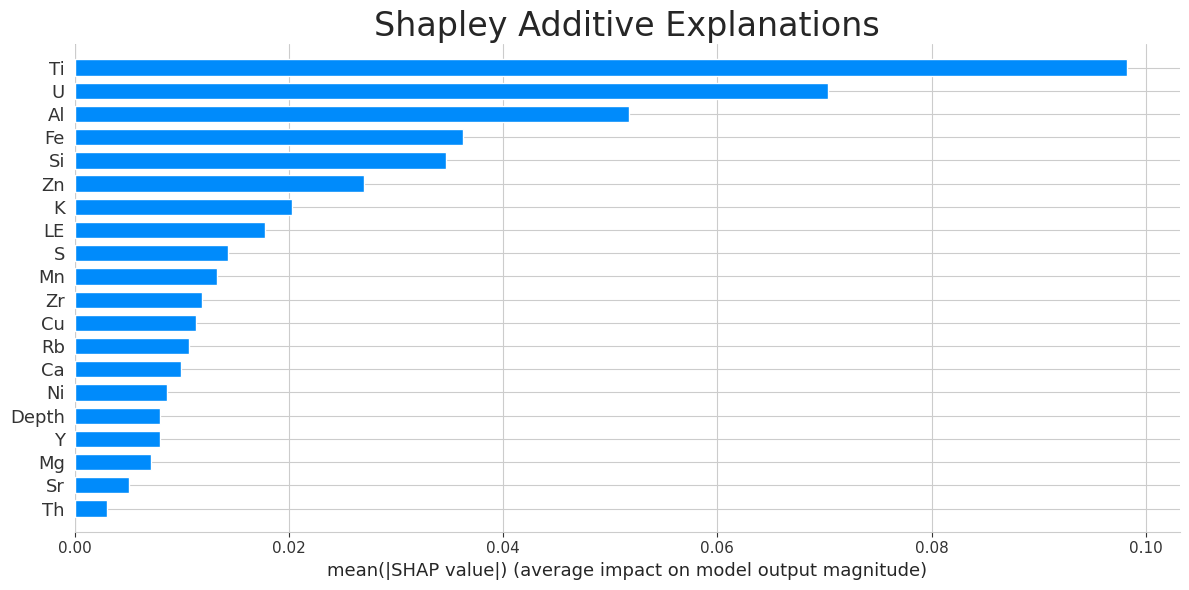

In [ ]:
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(X_test)

plt.title('Shapley Additive Explanations', fontsize = 24)
shap.summary_plot(shap_values[0], X_test, plot_type="bar", plot_size=[12,6], class_names = RF_model.classes_, cmap = {"Low":"#D81B60", "Moderate":"#FFC107", "High":"#1E88E5"}) # Class 0 is High, Class 1 is Low, and Class 2 is Moderate

SVM

In [ ]:
# Support Vector Machine
SVM_model = svm.SVC(kernel='rbf', C=150, gamma='scale')
SVM_model.fit(X_train, y_train)
SVM_predictions = SVM_model.predict(X_test)
SVM_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
SVM_scores = cross_val_score(SVM_model, X, y, scoring='accuracy', cv=SVM_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(SVM_scores), std(SVM_scores))))

Accuracy: 0.809 (0.069)


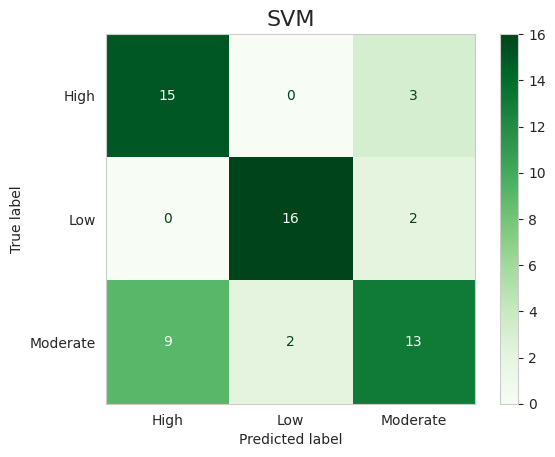

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, SVM_predictions, labels=SVM_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM_model.classes_)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')
plt.title('SVM', fontsize = 16)
plt.grid(False)

In [ ]:
print(classification_report(y_test, SVM_predictions))

              precision    recall  f1-score   support

        High       0.62      0.83      0.71        18
         Low       0.89      0.89      0.89        18
    Moderate       0.72      0.54      0.62        24

    accuracy                           0.73        60
   macro avg       0.75      0.75      0.74        60
weighted avg       0.74      0.73      0.73        60



Logistic Regression

In [ ]:
# Logistic Regression
Logreg_model = LogisticRegression(C = 1, multi_class = 'ovr', max_iter = 1000)
Logreg_model.fit(X_train, y_train)
Logreg_predictions = Logreg_model.predict(X_test)
Logreg_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
Logreg_scores = cross_val_score(Logreg_model, X, y, scoring='accuracy', cv=Logreg_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(Logreg_scores), std(Logreg_scores))))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.827 (0.082)


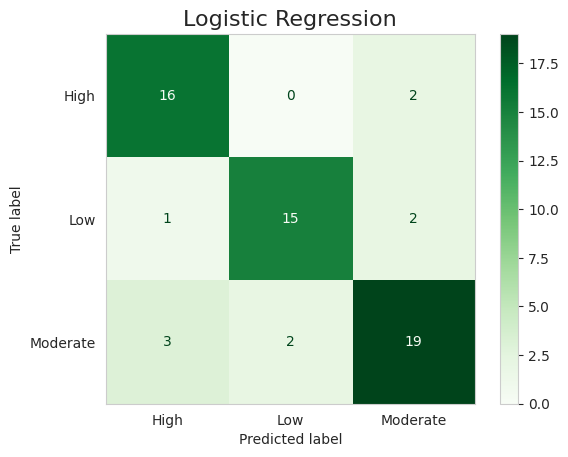

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, Logreg_predictions, labels=Logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Logreg_model.classes_)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')
plt.title('Logistic Regression', fontsize = 16)
plt.grid(False)

In [ ]:
print(classification_report(y_test, Logreg_predictions))

              precision    recall  f1-score   support

        High       0.80      0.89      0.84        18
         Low       0.88      0.83      0.86        18
    Moderate       0.83      0.79      0.81        24

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.84      0.83      0.83        60



Ensemble Model

In [ ]:
# Ensemble Model
estimators = [('RF', RF_model), ('kNN', kNN_model), ('SVM', SVM_model), ('Logred', Logreg_model)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
ensemble_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ensemble_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=ensemble_cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % ((mean(ensemble_scores), std(ensemble_scores))))
ensemble.score(X_test, y_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.871 (0.065)


0.9

Real Data Prediction and Probablity Estimator

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

url = 'https://raw.githubusercontent.com/FloydNichols97/BC_Cores/main/LCL5B_ML.csv'
LCL5B = pd.read_csv(url)
LCL5B = LCL5B.rename(columns={"d13C (VPDB)":"d13C", "Category ":"Category",
                                              "d15N ":"d15N"})
LCL5B['C_N'] = (LCL5B['TOC']/LCL5B['TON'])

# create a list of our conditions
conditions = [
    (LCL5B['TOC'] <= 2.5),
    (LCL5B['TOC'] > 2.5) & (LCL5B['TOC'] <= 10),
    (LCL5B['TOC'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Moderate', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
LCL5B['Productivity'] = np.select(conditions, values)

LCL5B = LCL5B.drop(columns=['Year ', 'Season', 'Category', 'Type', 'Sample', 'Lake', 'Brine', 'Age ',
                                            'TLE', 'S% by weight ', 'DIC', 'TOC', 'TON', 'd13C', 'd15N', 'MS1 ', 'C_N'])
LCL5B = LCL5B.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
LCL5B = LCL5B.dropna()

X_LCL5B = LCL5B.drop(columns=['Productivity'])
y = LCL5B['Productivity']

np.random.seed(300)
# RF
RF = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, min_samples_split = 5, bootstrap=True))
RF.fit(X_train, y_train)
RF.predict_proba(X_test)
predict_RF = RF_model.predict(X_LCL5B)
probabilities_RF = RF.predict_proba(X_LCL5B)
probabilities_RF = pd.DataFrame(probabilities_RF)
probabilities_RF = probabilities_RF.rename({0: 'High',
                                              1: 'Low',
                                              2: 'Moderate'}, axis = 1)

# kNN
kNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=10, weights='distance'))
kNN.fit(X_train, y_train)
kNN.predict_proba(X_test)
predict_kNN = kNN_model.predict(X_LCL5B)
probabilities_kNN = kNN.predict_proba(X_LCL5B)
probabilities_kNN = pd.DataFrame(probabilities_kNN)
probabilities_kNN = probabilities_kNN.rename({0: 'High',
                                              1: 'Low',
                                              2: 'Moderate'}, axis = 1)

# SVM
SVM = OneVsRestClassifier(svm.SVC(kernel='rbf', C=50, gamma='scale', probability = True))
SVM.fit(X_train, y_train)
SVM.predict_proba(X_test)
predict_SVM = SVM_model.predict(X_LCL5B)
probabilities_SVM = SVM.predict_proba(X_LCL5B)
probabilities_SVM = pd.DataFrame(probabilities_SVM)
probabilities_SVM = probabilities_SVM.rename({0: 'High',
                                              1: 'Low',
                                              2: 'Moderate'}, axis = 1)

# Logreg
Logreg = OneVsRestClassifier(svm.SVC(kernel='rbf', C=50, gamma='scale', probability = True))
Logreg.fit(X_train, y_train)
Logreg.predict_proba(X_test)
predict_Logreg = Logreg_model.predict(X_LCL5B)
probabilities_Logreg = Logreg.predict_proba(X_LCL5B)
probabilities_Logreg = pd.DataFrame(probabilities_Logreg)
probabilities_Logreg = probabilities_Logreg.rename({0: 'High',
                                              1: 'Low',
                                              2: 'Moderate'}, axis = 1)

<Axes: title={'center': 'Logistic Regression'}>

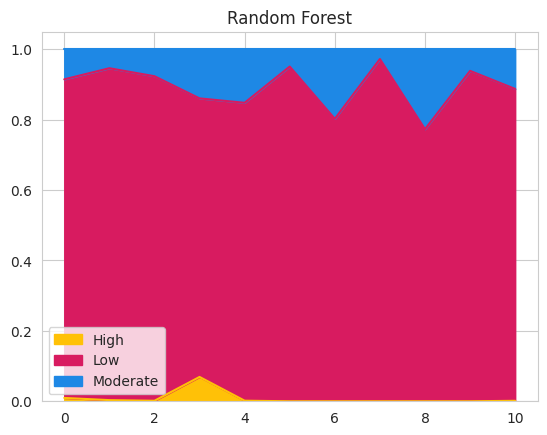

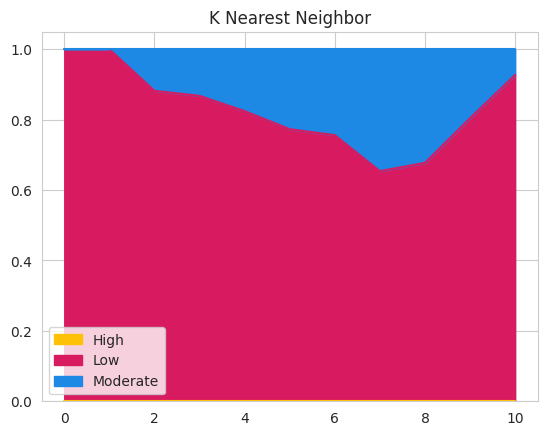

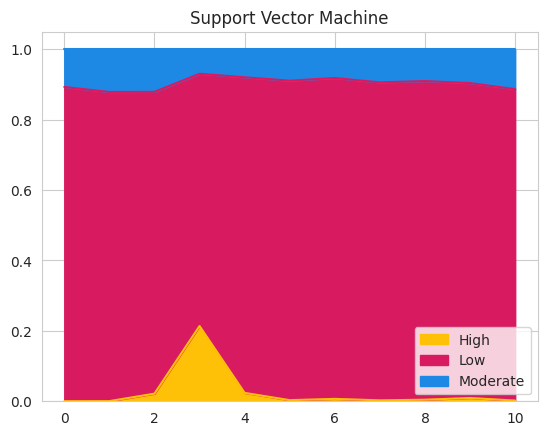

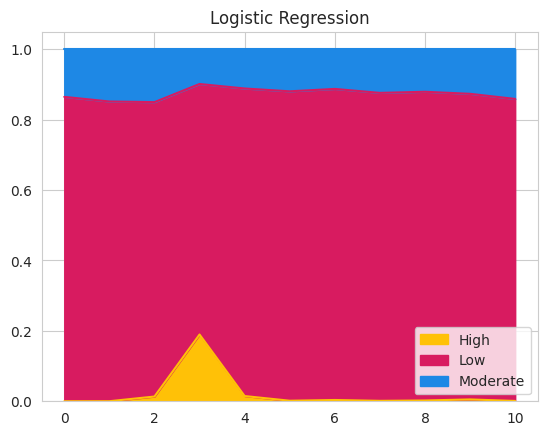

In [ ]:
#(2,2,1)
#probabilities_RF.plot(kind='bar', stacked=True, edgecolor = 'k',
#                   color=['#FFC107', '#D81B60', '#1E88E5'], width = 1, title = "Random Forest")
#(2,2,2)
#probabilities_kNN.plot(kind='bar', stacked=True, edgecolor = 'k',
#                   color=['#FFC107', '#D81B60', '#1E88E5'], width = 1, title = "K Nearest Neighbor")
#(2,2,3)
#probabilities_SVM.plot(kind='bar', stacked=True, edgecolor = 'k',
#                   color=['#FFC107', '#D81B60', '#1E88E5'], width = 1, title = "Support Vector Machine")
#(2,2,4)
#probabilities_Logreg.plot(kind='bar', stacked=True, edgecolor = 'k',
#                   color=['#FFC107', '#D81B60', '#1E88E5'], width = 1, title = "Logistic Regression")

(2,2,1)
probabilities_RF.plot(kind='area', stacked=True, color=['#FFC107', '#D81B60', '#1E88E5'],  title = "Random Forest")
(2,2,2)
probabilities_kNN.plot(kind='area', stacked=True, color=['#FFC107', '#D81B60', '#1E88E5'],  title = "K Nearest Neighbor")
(2,2,3)
probabilities_SVM.plot(kind='area', stacked=True, color=['#FFC107', '#D81B60', '#1E88E5'],  title = "Support Vector Machine")
(2,2,4)
probabilities_Logreg.plot(kind='area', stacked=True, color=['#FFC107', '#D81B60', '#1E88E5'],  title = "Logistic Regression")
